# Identifying Stars with Exoplanets - Akshay Hari - CB.EN.P2AID20009

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, normalize 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,accuracy_score,plot_confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy import ndimage
from sklearn import  metrics
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
train = pd.read_csv('C:/JupyterRoot/Datasets/exoTrain.csv')
test = pd.read_csv('C:/JupyterRoot/Datasets/exoTest.csv')

In [5]:
train

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [6]:
test

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,1,374.46,326.06,319.87,338.23,251.54,209.84,186.35,167.46,135.45,...,-123.55,-166.90,-222.44,-209.71,-180.16,-166.83,-235.66,-213.63,-205.99,-194.07
566,1,-0.36,4.96,6.25,4.20,8.26,-9.53,-10.10,-4.54,-11.55,...,-12.40,-5.99,-17.94,-11.96,-12.11,-13.68,-3.59,-5.32,-10.98,-11.24
567,1,-54.01,-44.13,-41.23,-42.82,-39.47,-24.88,-31.14,-24.71,-13.12,...,-0.73,-1.64,1.58,-4.82,-11.93,-17.14,-4.25,5.47,14.46,18.70
568,1,91.36,85.60,48.81,48.69,70.05,22.30,11.63,37.86,28.27,...,2.44,11.53,-16.42,-17.86,21.10,-10.25,-37.06,-8.43,-6.48,17.60


We are looking for U-shaped curves in the signal. The dataset doesn't seems to have any null or missing values.

## Sample Visualization

#### Stars with Exoplanets

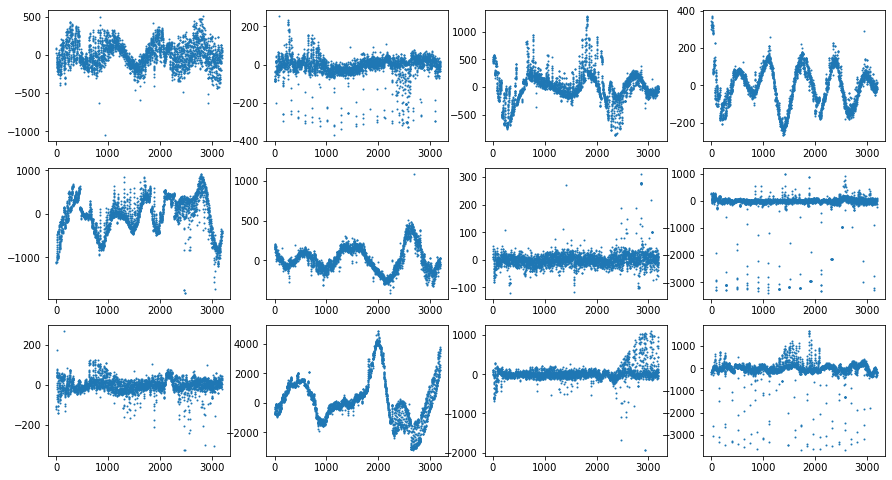

In [132]:
fig = plt.figure(figsize=(15,40))
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(np.arange(3197),train[train['LABEL']==2].iloc[i,1:],s=1)

### Stars without Exoplanets

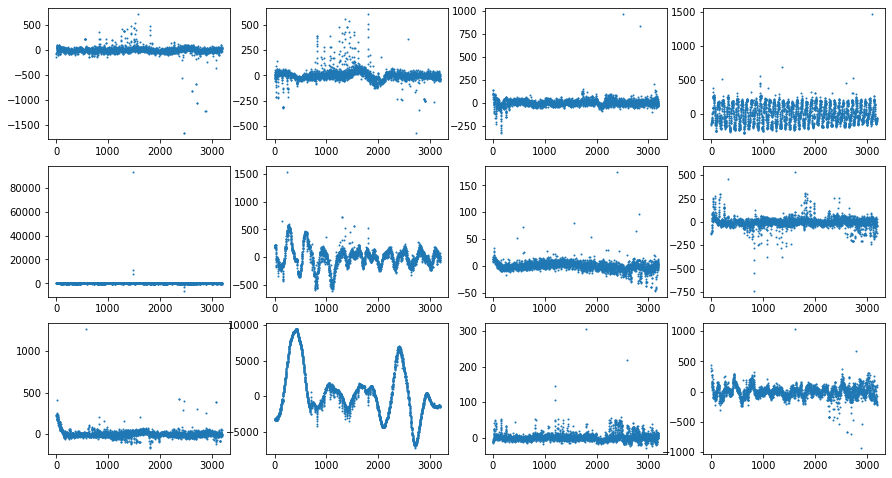

In [130]:
fig = plt.figure(figsize=(15,40))
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(np.arange(3197),train[train['LABEL']==1].iloc[i,1:],s=1)

### Histogram of Stars with Exoplanets

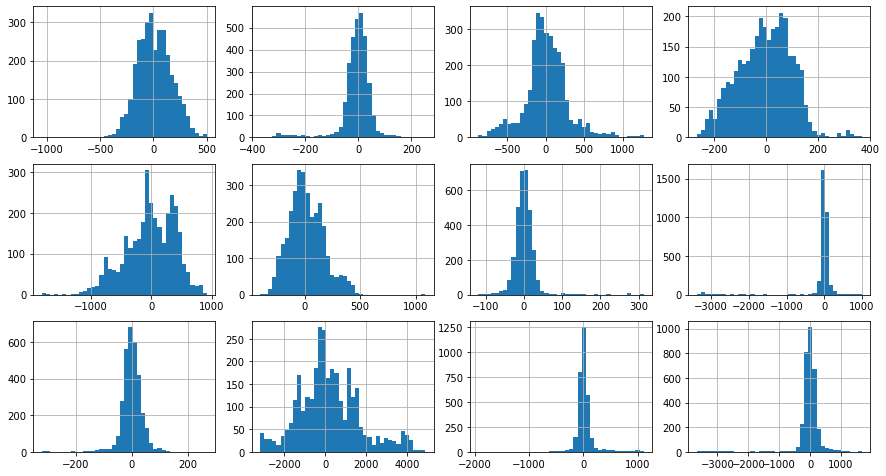

In [136]:
fig = plt.figure(figsize=(15,40))
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    train[train['LABEL']==2].iloc[i,1:].hist(bins=40)

### Histogram of Stars without Exoplanets

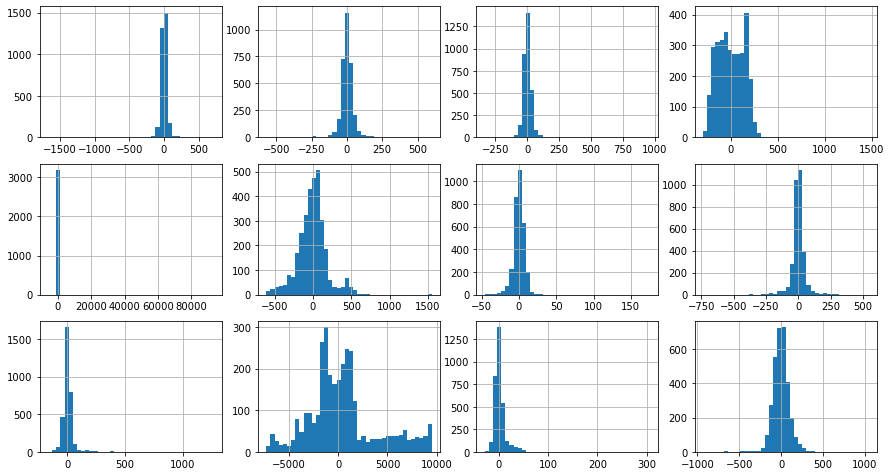

In [137]:
fig = plt.figure(figsize=(15,40))
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    train[train['LABEL']==1].iloc[i,1:].hist(bins=40)

## Range of maximum and minimum values.

In [78]:
maxval = train.iloc[:,1:].max(axis=1)
minval = train.iloc[:,1:].min(axis=1)

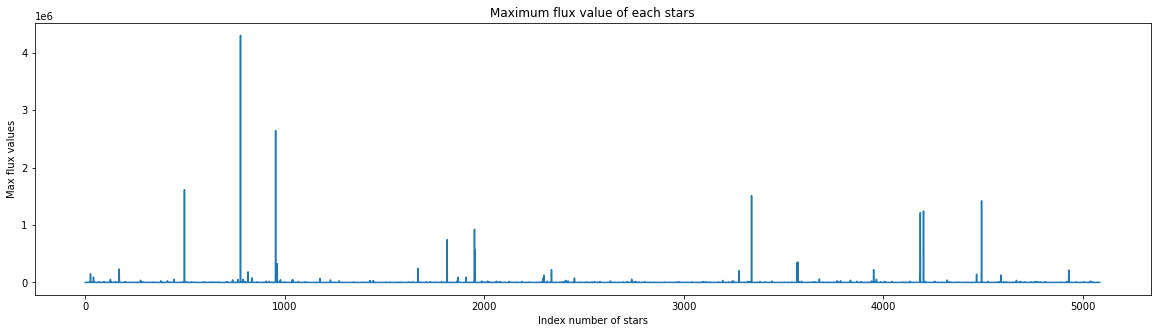

In [79]:
plt.figure(figsize=(20,5))
plt.title('Maximum flux value of each stars')
plt.xlabel('Index number of stars')
plt.ylabel('Max flux values')
plt.plot(np.arange(len(maxval)),maxval)

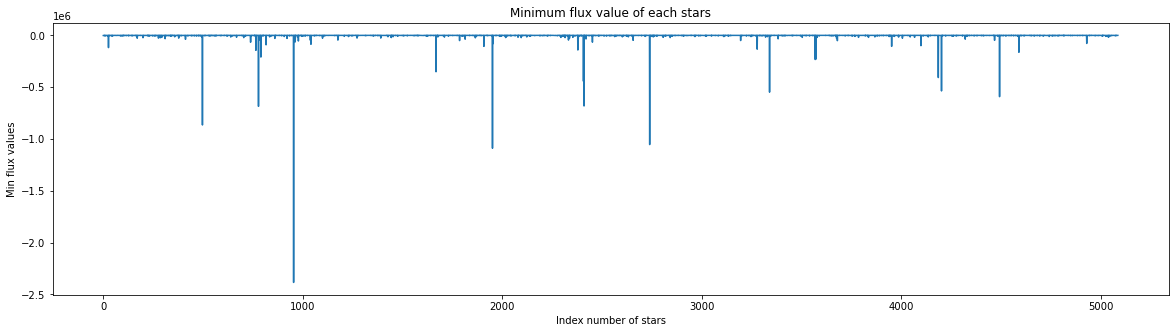

In [80]:
plt.figure(figsize=(20,5))
plt.title('Minimum flux value of each stars')
plt.xlabel('Index number of stars')
plt.ylabel('Min flux values')
plt.plot(np.arange(len(minval)),minval)

## Observations so far
- Dataset is highly imbalanced i.e. 100:1
- Even with a few plotted samples, we can see that, there are a lot of outliers.
- May contains noise as U-shaped curve is not easily visible
- So we may require signal filters and scalers

Defining ML models and scalers as function so that they can be reused

In [7]:
def reset(train,test):
    train_X = train.drop('LABEL', axis=1)
    train_y = train['LABEL'].values
    test_X = test.drop('LABEL', axis=1)
    test_y = test['LABEL'].values
    return train_X,train_y,test_X,test_y

train_X,train_y,test_X,test_y = reset(train,test)

In [8]:
def robust(df1,df2):
    scaler = RobustScaler()
    train_X = scaler.fit_transform(df1)
    test_X = scaler.transform(df2)
    return train_X,test_X

In [9]:
def std_scaler(df1,df2):
    std_scaler = StandardScaler()
    train_X = std_scaler.fit_transform(df1)
    test_X = std_scaler.fit_transform(df2)
    return train_X,test_X

In [10]:
def norm(df1,df2):
    train_X = normalize(df1)
    test_X = normalize(df2)
    return train_X,test_X

In [81]:
# def gaussian(df1,df2):
#     train_X = ndimage.filters.gaussian_filter(df1, sigma=10)
#     test_X = ndimage.filters.gaussian_filter(df2, sigma=10)
#     return train_X,test_X

In [12]:
def fourier(df1,df2):
    train_X = np.abs(np.fft.fft(df1, axis=1))
    test_X = np.abs(np.fft.fft(df2, axis=1))
    return train_X,test_X

In [13]:
def savgol(df1,df2):
    x = savgol_filter(df1,21,4,deriv=0)
    y = savgol_filter(df2,21,4,deriv=0)
    return x,y

In [14]:
def smote(a,b):
    model = SMOTE()
    X,y = model.fit_sample(a, b)
    return X,y

In [15]:
def logistic(train_X,train_y,test_X,test_y):
    lgr = LogisticRegression(max_iter=1000)
    lgr.fit(train_X,train_y)
    prediction_lgr=lgr.predict(test_X)
    print("-------------------------------------------")
    print("Logistic Regression")
    print("")
    print(classification_report(test_y,prediction_lgr))
    fig = plt.figure(figsize=(18,5))
    ax = fig.add_subplot(1,3,1)
    plot_confusion_matrix(lgr,test_X,test_y,ax=ax)
    ax = fig.add_subplot(1,3,2)
    metrics.plot_roc_curve(lgr,test_X, test_y,ax=ax)
    plt.plot([0, 1], [0, 1], 'k--')
    ax = fig.add_subplot(1,3,3)
    metrics.plot_precision_recall_curve(lgr, test_X, test_y,ax=ax)
    f1=metrics.f1_score(test_y, prediction_lgr,pos_label=2)
    print("F1 score of minority class:",f1)
    plt.show()
    return f1
#logistic(train_X,train_y,test_X,test_y)

In [16]:
def decisionTree(train_X,train_y,test_X,test_y):
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(train_X, train_y)
    y_pred_clf = clf.predict(test_X)
    print("-------------------------------------------")
    print("DecisionTree Classifier")
    print("")
    print(classification_report(test_y,y_pred_clf))
    fig = plt.figure(figsize=(18,5))
    ax = fig.add_subplot(1,3,1)
    plot_confusion_matrix(clf,test_X,test_y,ax=ax)
    ax = fig.add_subplot(1,3,2)
    metrics.plot_roc_curve(clf,test_X, test_y,ax=ax)
    plt.plot([0, 1], [0, 1], 'k--')
    ax = fig.add_subplot(1,3,3)
    metrics.plot_precision_recall_curve(clf, test_X, test_y,ax=ax)
    f1=metrics.f1_score(test_y, y_pred_clf,pos_label=2)
    print("F1 score of minority class:",f1)
    plt.show()
    return f1

#decisionTree(train_X,train_y,test_X,test_y)

In [17]:
def linearSVC(train_X,train_y,test_X,test_y):
    svm=LinearSVC()
    svm.fit(train_X,train_y)
    prediction_svm=svm.predict(test_X)
    print("-------------------------------------------")
    print("Linear SVClassifier")
    print("")
    print(classification_report(test_y,prediction_svm))
    fig = plt.figure(figsize=(18,5))
    ax = fig.add_subplot(1,3,1)
    plot_confusion_matrix(svm,test_X,test_y,ax=ax)
    ax = fig.add_subplot(1,3,2)
    metrics.plot_roc_curve(svm,test_X, test_y,ax=ax)
    plt.plot([0, 1], [0, 1], 'k--')
    ax = fig.add_subplot(1,3,3)
    metrics.plot_precision_recall_curve(svm, test_X, test_y,ax=ax)
    f1=metrics.f1_score(test_y, prediction_svm,pos_label=2)
    print("F1 score of minority class:",f1)
    plt.show()
    return f1
#linearSVC(train_X,train_y,test_X,test_y)

In [18]:
def naiveBayes(train_X,train_y,test_X,test_y):
    gnb = GaussianNB()
    gnb.fit(train_X, train_y)
    y_pred=gnb.predict(test_X)
    print("-------------------------------------------")
    print("Gaussian NaiveBayes Classifier")
    print("")
    print(classification_report(test_y,y_pred))
    fig = plt.figure(figsize=(18,5))
    ax = fig.add_subplot(1,3,1)
    plot_confusion_matrix(gnb,test_X,test_y,ax=ax)
    ax = fig.add_subplot(1,3,2)
    metrics.plot_roc_curve(gnb,test_X, test_y,ax=ax)
    plt.plot([0, 1], [0, 1], 'k--')
    ax = fig.add_subplot(1,3,3)
    metrics.plot_precision_recall_curve(gnb, test_X, test_y,ax=ax)
    f1 = metrics.f1_score(test_y, y_pred,pos_label=2)
    print("F1 score of minority class:",f1)
    plt.show()
    return f1
#naiveBayes(train_X,train_y,test_X,test_y)

In [19]:
def knn(train_X,train_y,test_X,test_y):
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(train_X, train_y)
    y_pred_neigh = neigh.predict(test_X)
    print("-------------------------------------------")
    print("k-Nearest Neighbour Classifier")
    print("")
    print(classification_report(test_y,y_pred_neigh))
    fig = plt.figure(figsize=(18,5))
    ax = fig.add_subplot(1,3,1)
    plot_confusion_matrix(neigh,test_X,test_y,ax=ax)
    ax = fig.add_subplot(1,3,2)
    metrics.plot_roc_curve(neigh,test_X, test_y,ax=ax)
    plt.plot([0, 1], [0, 1], 'k--')
    ax = fig.add_subplot(1,3,3)
    metrics.plot_precision_recall_curve(neigh, test_X, test_y,ax=ax)
    plt.show()
    f1 = metrics.f1_score(test_y, y_pred_neigh,pos_label=2)
    print("F1 score of minority class:",f1)
    return f1
#knn(train_X,train_y,test_X,test_y) 

In [20]:
def randomForest(train_X,train_y,test_X,test_y):
    rnd = RandomForestClassifier()
    rnd.fit(train_X, train_y)
    y_pred_rnd = rnd.predict(test_X)
    print("-------------------------------------------")
    print("Random Forest Classifier")
    print("")
    print(classification_report(test_y,y_pred_rnd))
    fig = plt.figure(figsize=(18,5))
    ax = fig.add_subplot(1,3,1)
    plot_confusion_matrix(rnd,test_X,test_y,ax=ax)
    ax = fig.add_subplot(1,3,2)
    metrics.plot_roc_curve(rnd,test_X,test_y,ax=ax)
    plt.plot([0, 1], [0, 1], 'k--') 
    ax = fig.add_subplot(1,3,3)
    metrics.plot_precision_recall_curve(rnd, test_X, test_y,ax=ax)
    plt.show()
    f1 = metrics.f1_score(test_y, y_pred_rnd,pos_label=2)
    print("F1 score of minority class:",f1)
    return f1
#randomForest(train_X,train_y,test_X,test_y)

# Model comparison with Original Data

Since the data is highly imbalanced, the evaluation metrics that we will be using is **F1 scores and Precision-Recall curves**. Our main aim is to get high recall as possible without sacrificing much precision. In a worst case scenerio, it is okay for model to classify a star as non-exoplanet star as exoplanet-star as long as it doesn't classify an exoplanet star as non-exoplanet star ie missing stars with exoplanets.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-------------------------------------------
Logistic Regression

              precision    recall  f1-score   support

           1       1.00      0.64      0.78       565
           2       0.02      0.80      0.04         5

    accuracy                           0.64       570
   macro avg       0.51      0.72      0.41       570
weighted avg       0.99      0.64      0.77       570

F1 score of minority class: 0.03773584905660377


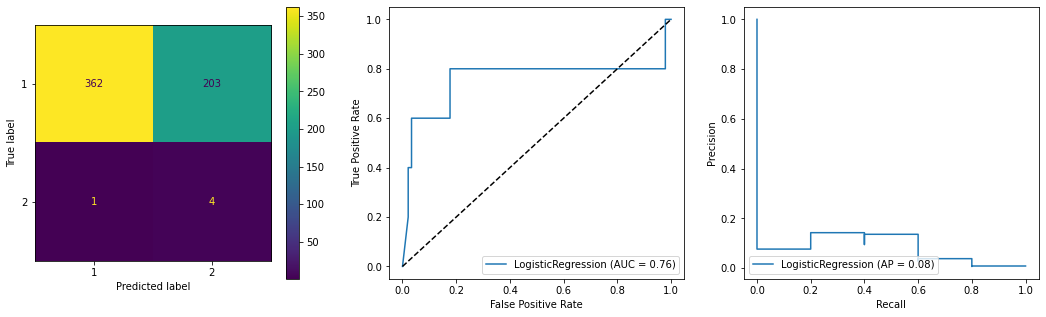

-------------------------------------------
DecisionTree Classifier

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       565
           2       0.12      0.20      0.15         5

    accuracy                           0.98       570
   macro avg       0.56      0.59      0.57       570
weighted avg       0.99      0.98      0.98       570

F1 score of minority class: 0.15384615384615385


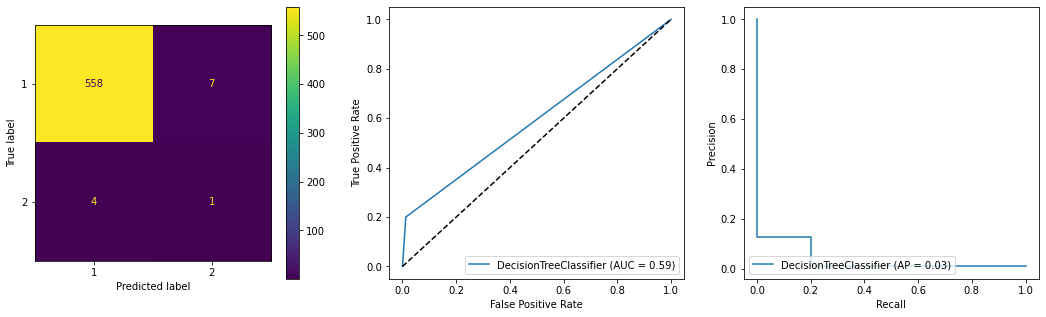

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


-------------------------------------------
Linear SVClassifier

              precision    recall  f1-score   support

           1       0.99      0.63      0.77       565
           2       0.01      0.60      0.03         5

    accuracy                           0.63       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.63      0.77       570

F1 score of minority class: 0.027906976744186046


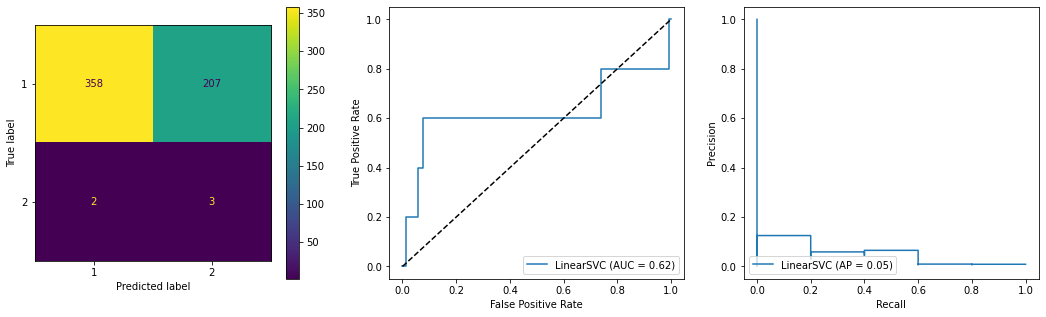

-------------------------------------------
Gaussian NaiveBayes Classifier

              precision    recall  f1-score   support

           1       1.00      0.02      0.03       565
           2       0.01      1.00      0.02         5

    accuracy                           0.02       570
   macro avg       0.50      0.51      0.02       570
weighted avg       0.99      0.02      0.03       570

F1 score of minority class: 0.017667844522968195


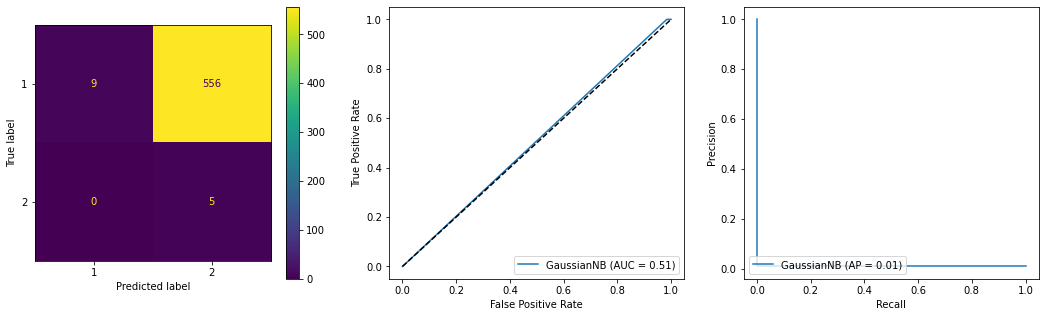

-------------------------------------------
k-Nearest Neighbour Classifier

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


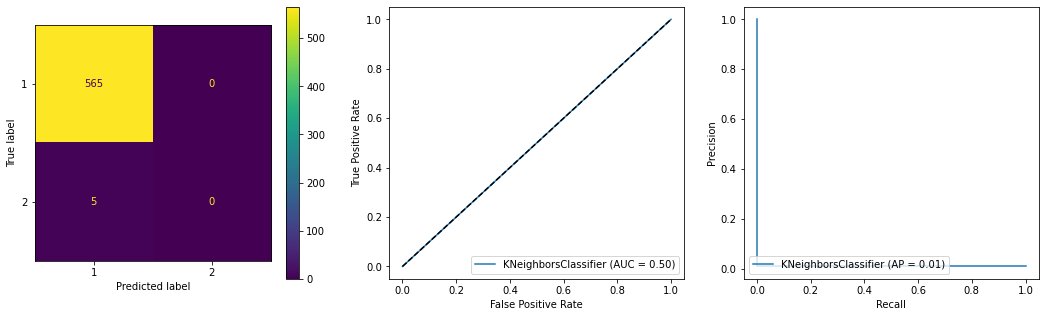

F1 score of minority class: 0.0
-------------------------------------------
Random Forest Classifier

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


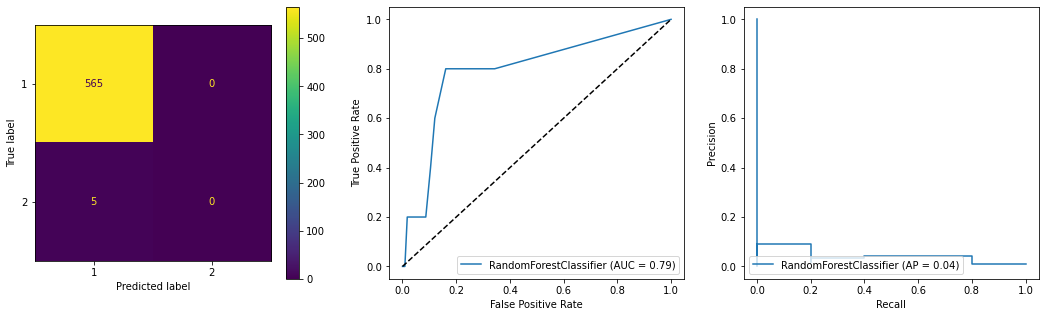

F1 score of minority class: 0.0


[0.03773584905660377,
 0.15384615384615385,
 0.027906976744186046,
 0.017667844522968195,
 0.0,
 0.0]

In [21]:
train_X,train_y,test_X,test_y = reset(train,test)
f1_original =  []
f1_original.append(logistic(train_X,train_y,test_X,test_y))
f1_original.append(decisionTree(train_X,train_y,test_X,test_y))
f1_original.append(linearSVC(train_X,train_y,test_X,test_y))
f1_original.append(naiveBayes(train_X,train_y,test_X,test_y))
f1_original.append(knn(train_X,train_y,test_X,test_y))
f1_original.append(randomForest(train_X,train_y,test_X,test_y))
f1_original

From the above results, decision tree classifier gave a better F1 score although it missed a few stars with exoplanets. The poor perfromance of the other models is because of non-processed data.

# Hyperparameter tuning with Logistic Regression and Linear SVC 

### Logistic Regression with Hyperparameter Tuning

In [140]:
train_X,train_y,test_X,test_y = reset(train,test)

solvers = ['newton-cg', 'lbfgs', 'sag', 'saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
reports_lg={}
for i in c_values:
    for j in solvers:
        print("C:",i," Solver:",j," Penalty: l2")
        lgr = LogisticRegression(penalty='l2',C=i,solver=j,max_iter=1000)
        lgr.fit(train_X,train_y)
        prediction_lgr=lgr.predict(test_X)
        report_lg=classification_report(test_y,prediction_lgr)
        f1 = metrics.f1_score(test_y, prediction_lgr,pos_label=2)
        reports_lg[("l2",i,j)]=[report_lg,f1]
        print(report_lg)

C: 100  Solver: newton-cg  Penalty: l2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


              precision    recall  f1-score   support

           1       1.00      0.67      0.80       565
           2       0.02      0.80      0.04         5

    accuracy                           0.67       570
   macro avg       0.51      0.73      0.42       570
weighted avg       0.99      0.67      0.79       570

C: 100  Solver: lbfgs  Penalty: l2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           1       1.00      0.63      0.77       565
           2       0.02      0.80      0.04         5

    accuracy                           0.63       570
   macro avg       0.51      0.72      0.41       570
weighted avg       0.99      0.63      0.77       570

C: 100  Solver: sag  Penalty: l2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


              precision    recall  f1-score   support

           1       0.99      0.69      0.81       565
           2       0.01      0.40      0.02         5

    accuracy                           0.68       570
   macro avg       0.50      0.54      0.42       570
weighted avg       0.98      0.68      0.80       570

C: 100  Solver: saga  Penalty: l2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


              precision    recall  f1-score   support

           1       0.99      0.70      0.82       565
           2       0.01      0.40      0.02         5

    accuracy                           0.70       570
   macro avg       0.50      0.55      0.42       570
weighted avg       0.98      0.70      0.81       570

C: 10  Solver: newton-cg  Penalty: l2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


              precision    recall  f1-score   support

           1       1.00      0.68      0.81       565
           2       0.02      0.80      0.04         5

    accuracy                           0.68       570
   macro avg       0.51      0.74      0.43       570
weighted avg       0.99      0.68      0.80       570

C: 10  Solver: lbfgs  Penalty: l2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           1       1.00      0.63      0.77       565
           2       0.02      0.80      0.04         5

    accuracy                           0.64       570
   macro avg       0.51      0.72      0.41       570
weighted avg       0.99      0.64      0.77       570

C: 10  Solver: sag  Penalty: l2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


              precision    recall  f1-score   support

           1       0.99      0.69      0.81       565
           2       0.01      0.40      0.02         5

    accuracy                           0.68       570
   macro avg       0.50      0.54      0.42       570
weighted avg       0.98      0.68      0.80       570

C: 10  Solver: saga  Penalty: l2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


              precision    recall  f1-score   support

           1       0.99      0.70      0.82       565
           2       0.01      0.40      0.02         5

    accuracy                           0.70       570
   macro avg       0.50      0.55      0.42       570
weighted avg       0.98      0.70      0.82       570

C: 1.0  Solver: newton-cg  Penalty: l2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


              precision    recall  f1-score   support

           1       1.00      0.70      0.82       565
           2       0.02      0.80      0.04         5

    accuracy                           0.70       570
   macro avg       0.51      0.75      0.43       570
weighted avg       0.99      0.70      0.82       570

C: 1.0  Solver: lbfgs  Penalty: l2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           1       1.00      0.64      0.78       565
           2       0.02      0.80      0.04         5

    accuracy                           0.64       570
   macro avg       0.51      0.72      0.41       570
weighted avg       0.99      0.64      0.77       570

C: 1.0  Solver: sag  Penalty: l2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


              precision    recall  f1-score   support

           1       0.99      0.69      0.81       565
           2       0.01      0.40      0.02         5

    accuracy                           0.68       570
   macro avg       0.50      0.54      0.42       570
weighted avg       0.98      0.68      0.80       570

C: 1.0  Solver: saga  Penalty: l2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


              precision    recall  f1-score   support

           1       0.99      0.70      0.82       565
           2       0.01      0.40      0.02         5

    accuracy                           0.70       570
   macro avg       0.50      0.55      0.42       570
weighted avg       0.98      0.70      0.81       570

C: 0.1  Solver: newton-cg  Penalty: l2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


              precision    recall  f1-score   support

           1       1.00      0.73      0.84       565
           2       0.03      0.80      0.05         5

    accuracy                           0.73       570
   macro avg       0.51      0.76      0.44       570
weighted avg       0.99      0.73      0.83       570

C: 0.1  Solver: lbfgs  Penalty: l2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           1       1.00      0.64      0.78       565
           2       0.02      0.80      0.04         5

    accuracy                           0.64       570
   macro avg       0.51      0.72      0.41       570
weighted avg       0.99      0.64      0.77       570

C: 0.1  Solver: sag  Penalty: l2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


              precision    recall  f1-score   support

           1       0.99      0.69      0.81       565
           2       0.01      0.40      0.02         5

    accuracy                           0.68       570
   macro avg       0.50      0.54      0.42       570
weighted avg       0.98      0.68      0.80       570

C: 0.1  Solver: saga  Penalty: l2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


              precision    recall  f1-score   support

           1       0.99      0.70      0.82       565
           2       0.01      0.40      0.02         5

    accuracy                           0.70       570
   macro avg       0.50      0.55      0.42       570
weighted avg       0.98      0.70      0.81       570

C: 0.01  Solver: newton-cg  Penalty: l2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


              precision    recall  f1-score   support

           1       1.00      0.81      0.89       565
           2       0.04      0.80      0.07         5

    accuracy                           0.81       570
   macro avg       0.52      0.81      0.48       570
weighted avg       0.99      0.81      0.89       570

C: 0.01  Solver: lbfgs  Penalty: l2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           1       1.00      0.63      0.77       565
           2       0.02      0.80      0.04         5

    accuracy                           0.63       570
   macro avg       0.51      0.71      0.40       570
weighted avg       0.99      0.63      0.76       570

C: 0.01  Solver: sag  Penalty: l2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


              precision    recall  f1-score   support

           1       0.99      0.69      0.81       565
           2       0.01      0.40      0.02         5

    accuracy                           0.68       570
   macro avg       0.50      0.54      0.42       570
weighted avg       0.98      0.68      0.80       570

C: 0.01  Solver: saga  Penalty: l2
              precision    recall  f1-score   support

           1       0.99      0.70      0.82       565
           2       0.01      0.40      0.02         5

    accuracy                           0.70       570
   macro avg       0.50      0.55      0.42       570
weighted avg       0.98      0.70      0.81       570



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Linear SVC with Hyperparameter Tuning

In [75]:
train_X,train_y,test_X,test_y = reset(train,test)

c=[0.01,0.1,1,10,100]
penalty = ['l1','l2']
loss = ['hinge','squared_hinge']
fit_intercept = [True,False]
max_iter = [1000,2000]
reports_lsvc={}            
for i in c:
    for j in penalty:
        for k in loss:
            for m in fit_intercept:
                for n in max_iter:
                    if (j=='l1' and (k in ['hinge','squared_hinge'])):
                        continue
                    print("---------------------------------------------")
                    print("C:",i,"Penalty:",j,"Loss:",k,"fit_intercept:",m,"max_iter:",n)
                    svm=LinearSVC(penalty=j, loss=k, C=i, fit_intercept=m,max_iter=n,class_weight={1:100,2:1})
                    svm.fit(train_X,train_y)
                    prediction_svm=svm.predict(test_X)
                    report=classification_report(test_y,prediction_svm)
                    f1 = metrics.f1_score(test_y, prediction_svm,pos_label=2)
                    reports_lsvc[(i,j,k,m,n)]=[report,f1]
                    print(report)

---------------------------------------------
C: 0.01 Penalty: l2 Loss: hinge fit_intercept: True max_iter: 1000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       1.00      0.64      0.78       565
           2       0.02      0.80      0.04         5

    accuracy                           0.64       570
   macro avg       0.51      0.72      0.41       570
weighted avg       0.99      0.64      0.77       570

---------------------------------------------
C: 0.01 Penalty: l2 Loss: hinge fit_intercept: True max_iter: 2000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       1.00      0.63      0.77       565
           2       0.02      0.80      0.04         5

    accuracy                           0.63       570
   macro avg       0.51      0.72      0.41       570
weighted avg       0.99      0.63      0.77       570

---------------------------------------------
C: 0.01 Penalty: l2 Loss: hinge fit_intercept: False max_iter: 1000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.63      0.77       565
           2       0.01      0.60      0.03         5

    accuracy                           0.63       570
   macro avg       0.50      0.61      0.40       570
weighted avg       0.99      0.63      0.76       570

---------------------------------------------
C: 0.01 Penalty: l2 Loss: hinge fit_intercept: False max_iter: 2000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.63      0.77       565
           2       0.01      0.60      0.03         5

    accuracy                           0.63       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.63      0.77       570

---------------------------------------------
C: 0.01 Penalty: l2 Loss: squared_hinge fit_intercept: True max_iter: 1000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.64      0.78       565
           2       0.01      0.60      0.03         5

    accuracy                           0.64       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.64      0.77       570

---------------------------------------------
C: 0.01 Penalty: l2 Loss: squared_hinge fit_intercept: True max_iter: 2000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.64      0.78       565
           2       0.01      0.60      0.03         5

    accuracy                           0.64       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.64      0.77       570

---------------------------------------------
C: 0.01 Penalty: l2 Loss: squared_hinge fit_intercept: False max_iter: 1000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.63      0.77       565
           2       0.01      0.60      0.03         5

    accuracy                           0.63       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.63      0.77       570

---------------------------------------------
C: 0.01 Penalty: l2 Loss: squared_hinge fit_intercept: False max_iter: 2000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.63      0.77       565
           2       0.01      0.60      0.03         5

    accuracy                           0.63       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.63      0.77       570

---------------------------------------------
C: 0.1 Penalty: l2 Loss: hinge fit_intercept: True max_iter: 1000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.64      0.78       565
           2       0.01      0.60      0.03         5

    accuracy                           0.64       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.64      0.77       570

---------------------------------------------
C: 0.1 Penalty: l2 Loss: hinge fit_intercept: True max_iter: 2000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       1.00      0.64      0.78       565
           2       0.02      0.80      0.04         5

    accuracy                           0.64       570
   macro avg       0.51      0.72      0.41       570
weighted avg       0.99      0.64      0.77       570

---------------------------------------------
C: 0.1 Penalty: l2 Loss: hinge fit_intercept: False max_iter: 1000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.63      0.77       565
           2       0.01      0.60      0.03         5

    accuracy                           0.63       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.63      0.76       570

---------------------------------------------
C: 0.1 Penalty: l2 Loss: hinge fit_intercept: False max_iter: 2000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.63      0.77       565
           2       0.01      0.60      0.03         5

    accuracy                           0.63       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.63      0.77       570

---------------------------------------------
C: 0.1 Penalty: l2 Loss: squared_hinge fit_intercept: True max_iter: 1000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.64      0.78       565
           2       0.01      0.60      0.03         5

    accuracy                           0.64       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.64      0.77       570

---------------------------------------------
C: 0.1 Penalty: l2 Loss: squared_hinge fit_intercept: True max_iter: 2000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.63      0.77       565
           2       0.01      0.60      0.03         5

    accuracy                           0.63       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.63      0.77       570

---------------------------------------------
C: 0.1 Penalty: l2 Loss: squared_hinge fit_intercept: False max_iter: 1000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.63      0.77       565
           2       0.01      0.60      0.03         5

    accuracy                           0.63       570
   macro avg       0.50      0.61      0.40       570
weighted avg       0.99      0.63      0.76       570

---------------------------------------------
C: 0.1 Penalty: l2 Loss: squared_hinge fit_intercept: False max_iter: 2000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.63      0.77       565
           2       0.01      0.60      0.03         5

    accuracy                           0.63       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.63      0.77       570

---------------------------------------------
C: 1 Penalty: l2 Loss: hinge fit_intercept: True max_iter: 1000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.64      0.78       565
           2       0.01      0.60      0.03         5

    accuracy                           0.64       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.64      0.77       570

---------------------------------------------
C: 1 Penalty: l2 Loss: hinge fit_intercept: True max_iter: 2000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.63      0.77       565
           2       0.01      0.60      0.03         5

    accuracy                           0.63       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.63      0.77       570

---------------------------------------------
C: 1 Penalty: l2 Loss: hinge fit_intercept: False max_iter: 1000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.63      0.77       565
           2       0.01      0.60      0.03         5

    accuracy                           0.63       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.63      0.77       570

---------------------------------------------
C: 1 Penalty: l2 Loss: hinge fit_intercept: False max_iter: 2000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.63      0.77       565
           2       0.01      0.60      0.03         5

    accuracy                           0.63       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.63      0.77       570

---------------------------------------------
C: 1 Penalty: l2 Loss: squared_hinge fit_intercept: True max_iter: 1000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.63      0.77       565
           2       0.01      0.60      0.03         5

    accuracy                           0.63       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.63      0.77       570

---------------------------------------------
C: 1 Penalty: l2 Loss: squared_hinge fit_intercept: True max_iter: 2000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.63      0.77       565
           2       0.01      0.60      0.03         5

    accuracy                           0.63       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.63      0.77       570

---------------------------------------------
C: 1 Penalty: l2 Loss: squared_hinge fit_intercept: False max_iter: 1000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.63      0.77       565
           2       0.01      0.60      0.03         5

    accuracy                           0.63       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.63      0.77       570

---------------------------------------------
C: 1 Penalty: l2 Loss: squared_hinge fit_intercept: False max_iter: 2000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       1.00      0.64      0.78       565
           2       0.02      0.80      0.04         5

    accuracy                           0.64       570
   macro avg       0.51      0.72      0.41       570
weighted avg       0.99      0.64      0.77       570

---------------------------------------------
C: 10 Penalty: l2 Loss: hinge fit_intercept: True max_iter: 1000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.64      0.78       565
           2       0.01      0.60      0.03         5

    accuracy                           0.64       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.64      0.77       570

---------------------------------------------
C: 10 Penalty: l2 Loss: hinge fit_intercept: True max_iter: 2000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       1.00      0.63      0.77       565
           2       0.02      0.80      0.04         5

    accuracy                           0.63       570
   macro avg       0.51      0.72      0.41       570
weighted avg       0.99      0.63      0.77       570

---------------------------------------------
C: 10 Penalty: l2 Loss: hinge fit_intercept: False max_iter: 1000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.63      0.77       565
           2       0.01      0.60      0.03         5

    accuracy                           0.63       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.63      0.77       570

---------------------------------------------
C: 10 Penalty: l2 Loss: hinge fit_intercept: False max_iter: 2000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       1.00      0.63      0.77       565
           2       0.02      0.80      0.04         5

    accuracy                           0.63       570
   macro avg       0.51      0.72      0.41       570
weighted avg       0.99      0.63      0.77       570

---------------------------------------------
C: 10 Penalty: l2 Loss: squared_hinge fit_intercept: True max_iter: 1000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.64      0.78       565
           2       0.01      0.60      0.03         5

    accuracy                           0.64       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.64      0.77       570

---------------------------------------------
C: 10 Penalty: l2 Loss: squared_hinge fit_intercept: True max_iter: 2000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.64      0.78       565
           2       0.01      0.60      0.03         5

    accuracy                           0.64       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.64      0.77       570

---------------------------------------------
C: 10 Penalty: l2 Loss: squared_hinge fit_intercept: False max_iter: 1000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.64      0.78       565
           2       0.01      0.60      0.03         5

    accuracy                           0.64       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.64      0.77       570

---------------------------------------------
C: 10 Penalty: l2 Loss: squared_hinge fit_intercept: False max_iter: 2000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       1.00      0.63      0.77       565
           2       0.02      0.80      0.04         5

    accuracy                           0.64       570
   macro avg       0.51      0.72      0.41       570
weighted avg       0.99      0.64      0.77       570

---------------------------------------------
C: 100 Penalty: l2 Loss: hinge fit_intercept: True max_iter: 1000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       1.00      0.64      0.78       565
           2       0.02      0.80      0.04         5

    accuracy                           0.64       570
   macro avg       0.51      0.72      0.41       570
weighted avg       0.99      0.64      0.77       570

---------------------------------------------
C: 100 Penalty: l2 Loss: hinge fit_intercept: True max_iter: 2000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       1.00      0.64      0.78       565
           2       0.02      0.80      0.04         5

    accuracy                           0.64       570
   macro avg       0.51      0.72      0.41       570
weighted avg       0.99      0.64      0.77       570

---------------------------------------------
C: 100 Penalty: l2 Loss: hinge fit_intercept: False max_iter: 1000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       1.00      0.64      0.78       565
           2       0.02      0.80      0.04         5

    accuracy                           0.64       570
   macro avg       0.51      0.72      0.41       570
weighted avg       0.99      0.64      0.77       570

---------------------------------------------
C: 100 Penalty: l2 Loss: hinge fit_intercept: False max_iter: 2000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.63      0.77       565
           2       0.01      0.60      0.03         5

    accuracy                           0.63       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.63      0.77       570

---------------------------------------------
C: 100 Penalty: l2 Loss: squared_hinge fit_intercept: True max_iter: 1000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.64      0.78       565
           2       0.01      0.60      0.03         5

    accuracy                           0.64       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.64      0.77       570

---------------------------------------------
C: 100 Penalty: l2 Loss: squared_hinge fit_intercept: True max_iter: 2000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.64      0.78       565
           2       0.01      0.60      0.03         5

    accuracy                           0.64       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.64      0.77       570

---------------------------------------------
C: 100 Penalty: l2 Loss: squared_hinge fit_intercept: False max_iter: 1000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.99      0.63      0.77       565
           2       0.01      0.60      0.03         5

    accuracy                           0.63       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.63      0.77       570

---------------------------------------------
C: 100 Penalty: l2 Loss: squared_hinge fit_intercept: False max_iter: 2000
              precision    recall  f1-score   support

           1       1.00      0.63      0.77       565
           2       0.02      0.80      0.04         5

    accuracy                           0.64       570
   macro avg       0.51      0.72      0.41       570
weighted avg       0.99      0.64      0.77       570



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Even with the Hyperparameter tuning, most of the models gave a maximum F1 score of 0.04 which is unsatisfactory. Therefore we need to do feature engineering.

# Feature Engineering

I have tried different combinations of filering, scaling and normalizing, the results for which can be found in the CONCLUSION section. The best one among them is listed below.

Steps involved in feature engineering
- For reducing noise and filtering, we can apply fast fourier transform
- For signal smooting, Savitzky-Golay  filter can be applied.
- Then the signal can be normalized and then a robust scaler can be applied

The Robust scaler is ideal here because of the presence of the outliers.

## Visualization with feature engineering

In [104]:
train_X,train_y,test_X,test_y = reset(train,test)
a,b = fourier(train_X,test_X)
c,d = savgol(a,b)
e,f = norm(c,d)
g,h = robust(e,f)

In [107]:
#index 0-37 contains stars with exoplanets and the rest are stars with no exoplanets
planets = [0,1,2,3,4,5,6,44,56,67,78,91,92,97]

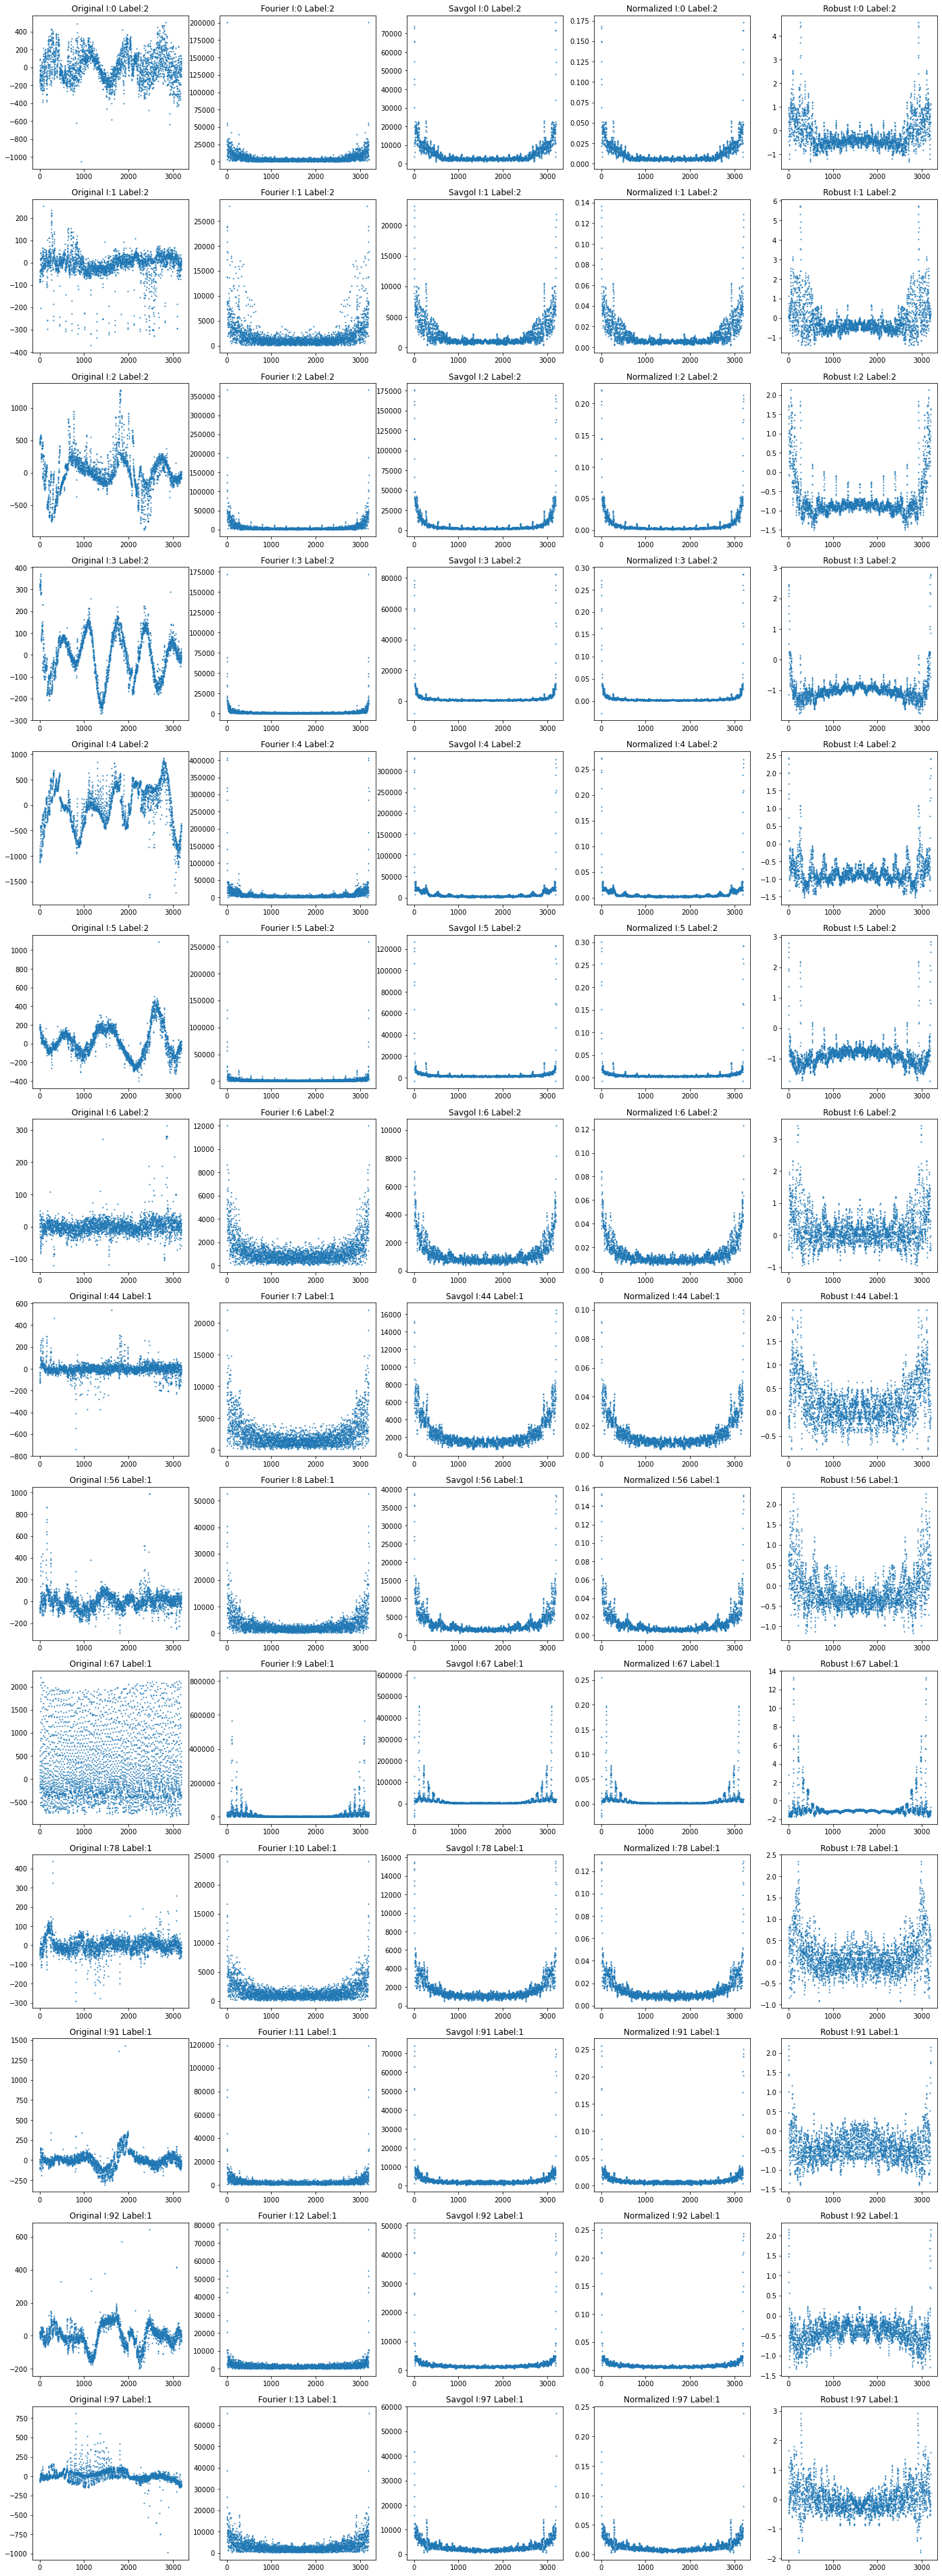

In [113]:
fig = plt.figure(figsize=(24,500))
x = np.array(range(3197))
for i in range(0,len(planets)):
    ax = fig.add_subplot(100,5,5*i+1)
    ax.set_title('Original '+"I:"+str(planets[i])+" Label:"+str(train_y[planets[i]]))
    ax.scatter(x,train_X.iloc[planets[i],:],s=1)
    
    ax = fig.add_subplot(100,5,5*i+2)
    ax.set_title('Fourier '+"I:"+str(i)+" Label:"+str(train_y[planets[i]]))
    ax.scatter(x,a[planets[i],:],s=1)
    
    ax = fig.add_subplot(100,5,5*i+3)
    ax.set_title('Savgol '+"I:"+str(planets[i])+" Label:"+str(train_y[planets[i]]))
    ax.scatter(x,c[planets[i],:],s=1)
    
    ax = fig.add_subplot(100,5,5*i+4)
    ax.set_title('Normalized '+"I:"+str(planets[i])+" Label:"+str(train_y[planets[i]]))
    ax.scatter(x,e[planets[i],:],s=1)
    
    ax = fig.add_subplot(100,5,5*i+5)
    ax.set_title('Robust '+"I:"+str(planets[i])+" Label:"+str(train_y[planets[i]]))
    ax.scatter(x,g[planets[i],:],s=1)    

# Model Comparison with feature engineering

-------------------------------------------
Logistic Regression

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       565
           2       0.60      0.60      0.60         5

    accuracy                           0.99       570
   macro avg       0.80      0.80      0.80       570
weighted avg       0.99      0.99      0.99       570

F1 score of minority class: 0.6


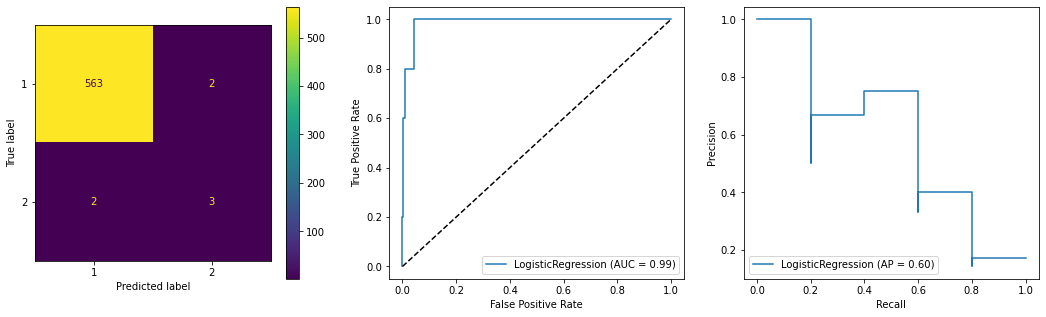

-------------------------------------------
DecisionTree Classifier

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       565
           2       1.00      1.00      1.00         5

    accuracy                           1.00       570
   macro avg       1.00      1.00      1.00       570
weighted avg       1.00      1.00      1.00       570

F1 score of minority class: 1.0


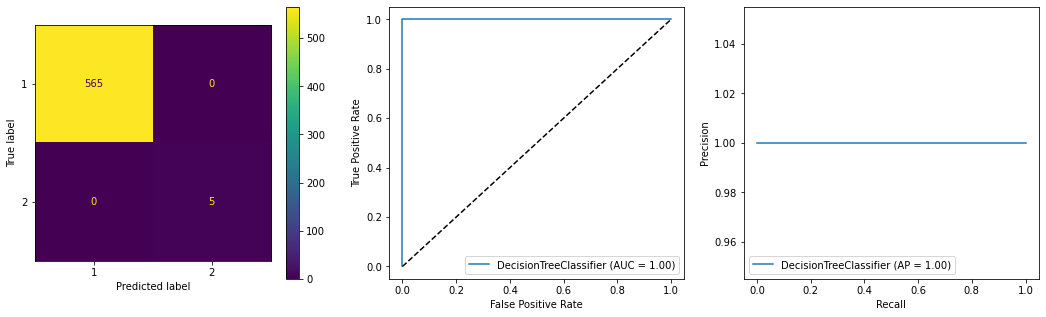

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


-------------------------------------------
Linear SVClassifier

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       565
           2       0.57      0.80      0.67         5

    accuracy                           0.99       570
   macro avg       0.78      0.90      0.83       570
weighted avg       0.99      0.99      0.99       570

F1 score of minority class: 0.6666666666666666


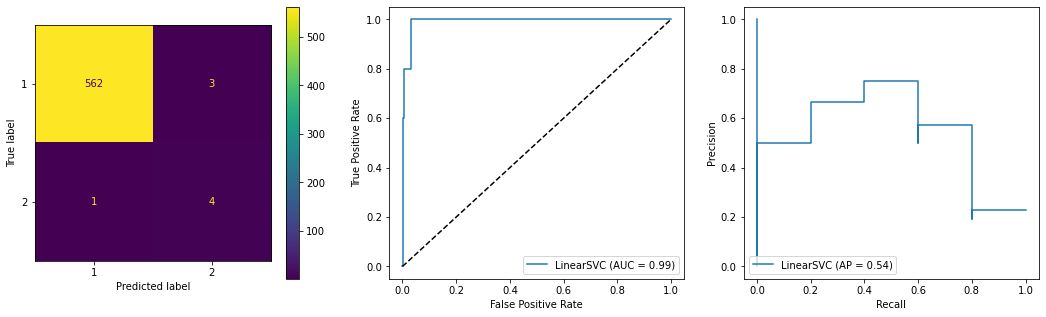

-------------------------------------------
Gaussian NaiveBayes Classifier

              precision    recall  f1-score   support

           1       1.00      0.77      0.87       565
           2       0.04      1.00      0.07         5

    accuracy                           0.77       570
   macro avg       0.52      0.88      0.47       570
weighted avg       0.99      0.77      0.86       570

F1 score of minority class: 0.0704225352112676


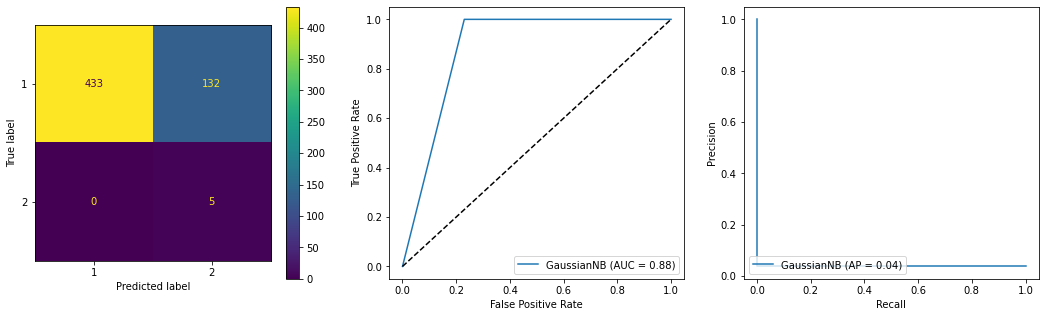

-------------------------------------------
k-Nearest Neighbour Classifier

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       1.00      0.40      0.57         5

    accuracy                           0.99       570
   macro avg       1.00      0.70      0.78       570
weighted avg       0.99      0.99      0.99       570



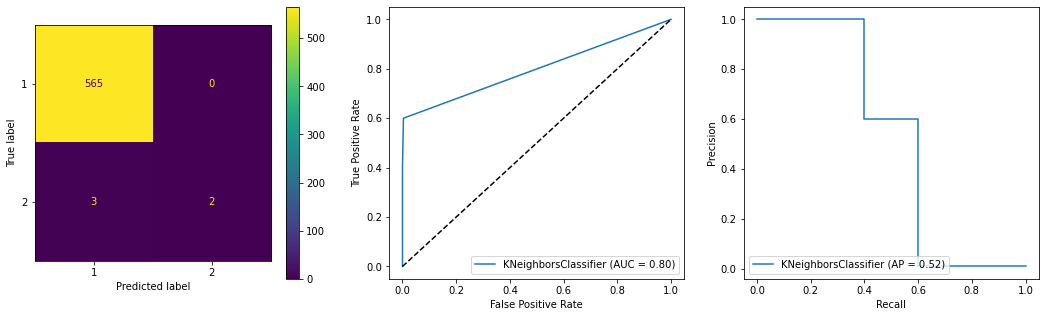

F1 score of minority class: 0.5714285714285715
-------------------------------------------
Random Forest Classifier

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       1.00      0.40      0.57         5

    accuracy                           0.99       570
   macro avg       1.00      0.70      0.78       570
weighted avg       0.99      0.99      0.99       570



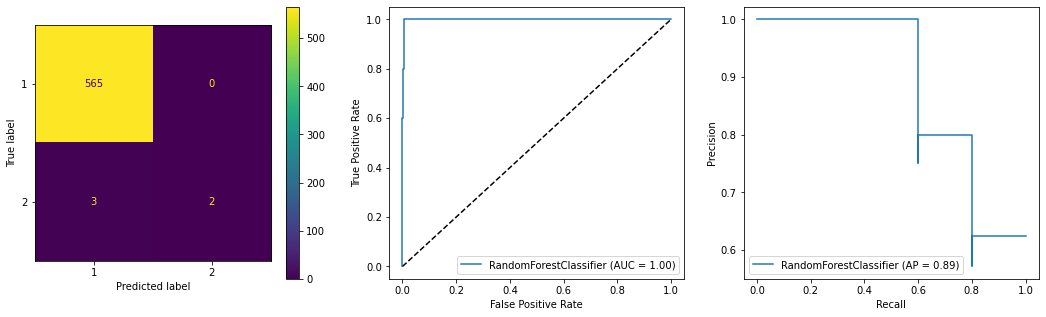

F1 score of minority class: 0.5714285714285715


[0.6,
 1.0,
 0.6666666666666666,
 0.0704225352112676,
 0.5714285714285715,
 0.5714285714285715]

In [22]:
train_X,train_y,test_X,test_y = reset(train,test)
train_X,test_X = fourier(train_X,test_X)
train_X,test_X = savgol(train_X,test_X)
train_X,test_X = norm(train_X,test_X)
train_X,test_X = robust(train_X,test_X)

f1_processed =  []
f1_processed.append(logistic(train_X,train_y,test_X,test_y))
f1_processed.append(decisionTree(train_X,train_y,test_X,test_y))
f1_processed.append(linearSVC(train_X,train_y,test_X,test_y))
f1_processed.append(naiveBayes(train_X,train_y,test_X,test_y))
f1_processed.append(knn(train_X,train_y,test_X,test_y))
f1_processed.append(randomForest(train_X,train_y,test_X,test_y))
f1_processed

We can see that with the feature engineering, the results have improved drastically even with our small imbalanced testing dataset. Here the **Decision Tree** model gave the best result.

# Model Comparison with SMOTE

Here, I am oversampling my training dataset. Then 30% of the data is extracted and merged with testing data. Now the resulting sample contains both artificial samples as well as the original sample.

-------------------------------------------
Logistic Regression

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2033
           2       0.99      1.00      1.00      1567

    accuracy                           1.00      3600
   macro avg       1.00      1.00      1.00      3600
weighted avg       1.00      1.00      1.00      3600

F1 score of minority class: 0.9968152866242038


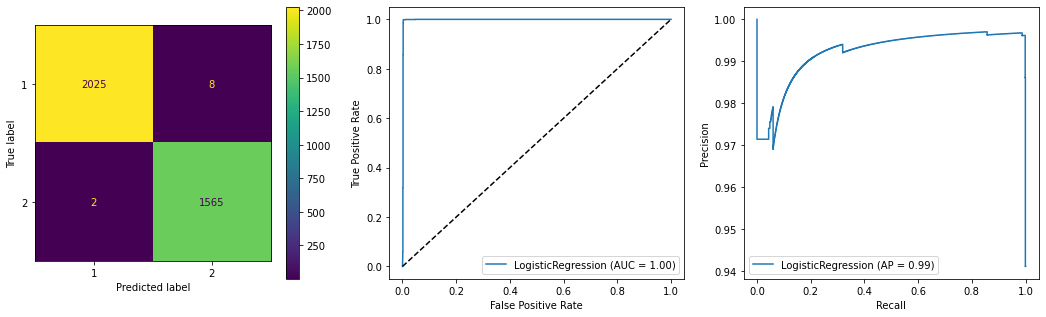

-------------------------------------------
DecisionTree Classifier

              precision    recall  f1-score   support

           1       1.00      0.99      0.99      2033
           2       0.98      1.00      0.99      1567

    accuracy                           0.99      3600
   macro avg       0.99      0.99      0.99      3600
weighted avg       0.99      0.99      0.99      3600

F1 score of minority class: 0.9904882688649334


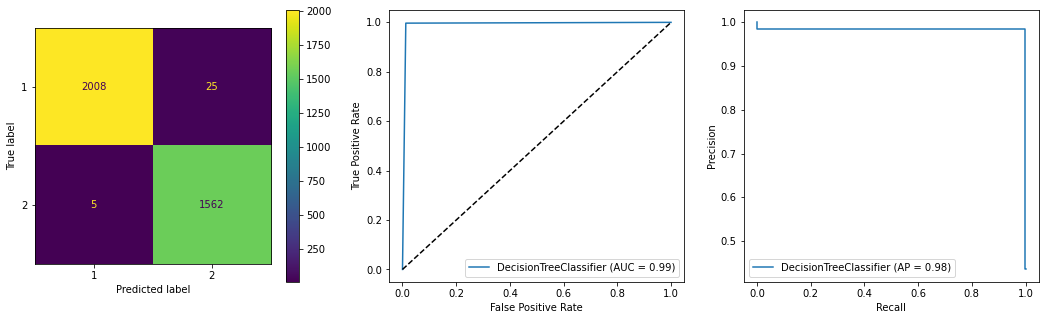

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


-------------------------------------------
Linear SVClassifier

              precision    recall  f1-score   support

           1       0.97      0.97      0.97      2033
           2       0.96      0.97      0.97      1567

    accuracy                           0.97      3600
   macro avg       0.97      0.97      0.97      3600
weighted avg       0.97      0.97      0.97      3600

F1 score of minority class: 0.9652755654667092


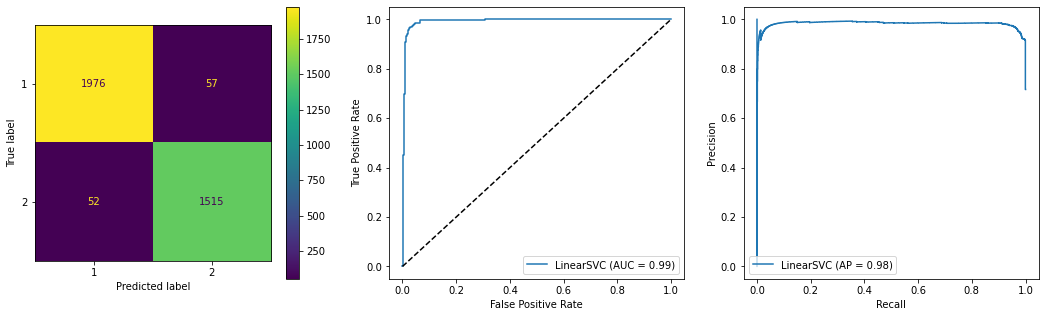

-------------------------------------------
Gaussian NaiveBayes Classifier

              precision    recall  f1-score   support

           1       0.85      0.72      0.78      2033
           2       0.70      0.83      0.76      1567

    accuracy                           0.77      3600
   macro avg       0.77      0.77      0.77      3600
weighted avg       0.78      0.77      0.77      3600

F1 score of minority class: 0.7568353694008143


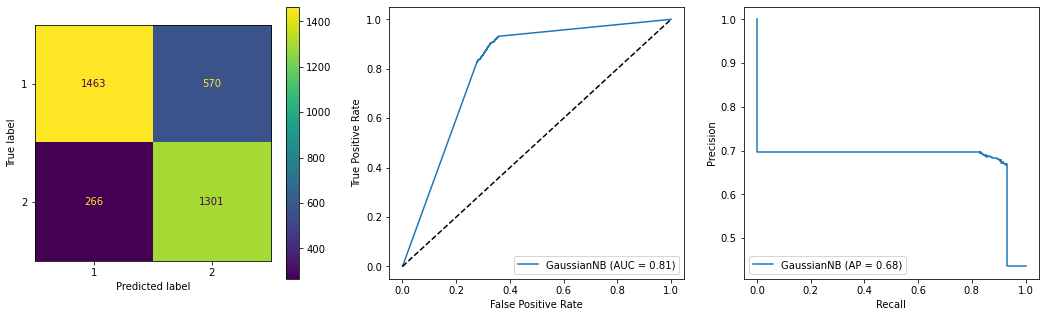

-------------------------------------------
k-Nearest Neighbour Classifier

              precision    recall  f1-score   support

           1       1.00      0.89      0.94      2033
           2       0.87      1.00      0.93      1567

    accuracy                           0.94      3600
   macro avg       0.94      0.94      0.94      3600
weighted avg       0.94      0.94      0.94      3600



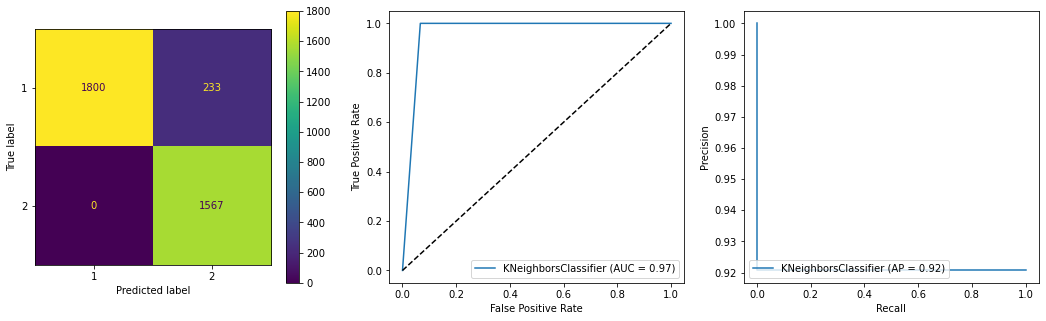

F1 score of minority class: 0.9307989307989308
-------------------------------------------
Random Forest Classifier

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2033
           2       1.00      1.00      1.00      1567

    accuracy                           1.00      3600
   macro avg       1.00      1.00      1.00      3600
weighted avg       1.00      1.00      1.00      3600



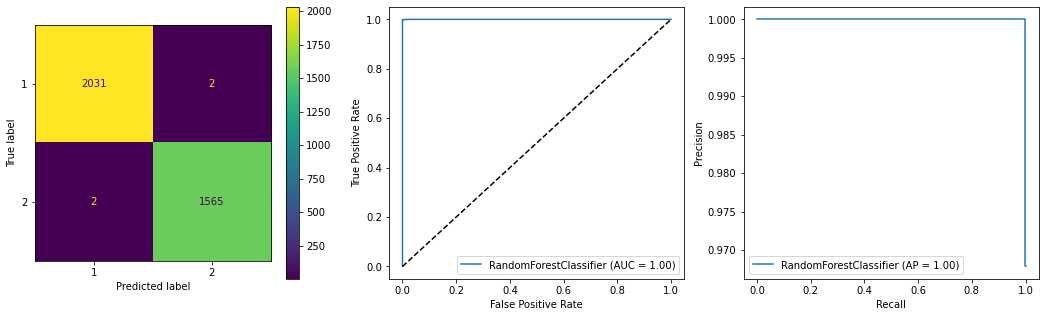

F1 score of minority class: 0.9987236758136566


[0.9968152866242038,
 0.9904882688649334,
 0.9652755654667092,
 0.7568353694008143,
 0.9307989307989308,
 0.9987236758136566]

In [23]:
train_X,train_y,test_X,test_y = reset(train,test)

train_X,test_X = fourier(train_X,test_X)
train_X,test_X = savgol(train_X,test_X)
train_X,test_X = norm(train_X,test_X)
train_X,test_X = robust(train_X,test_X)

train_X,train_y = smote(train_X,train_y)
train_X, X, train_y, y = train_test_split(train_X, train_y, test_size=0.3)
test_X = np.concatenate((test_X, X), axis=0)
test_y = np.concatenate((test_y, y), axis=0)

f1_smote =  []
f1_smote.append(logistic(train_X,train_y,test_X,test_y))
f1_smote.append(decisionTree(train_X,train_y,test_X,test_y))
f1_smote.append(linearSVC(train_X,train_y,test_X,test_y))
f1_smote.append(naiveBayes(train_X,train_y,test_X,test_y))
f1_smote.append(knn(train_X,train_y,test_X,test_y))
f1_smote.append(randomForest(train_X,train_y,test_X,test_y))
f1_smote

With SMOTE, the results have improved significantly. Only Gaussian Naive Bayes gave comparitively low score.

# Principal Component Analysis

In [24]:
train_X,train_y,test_X,test_y = reset(train,test)

train_X,test_X = fourier(train_X,test_X)
train_X,test_X = savgol(train_X,test_X)
train_X,test_X = norm(train_X,test_X)
train_X,test_X = robust(train_X,test_X)

train_X,train_y = smote(train_X,train_y)
train_X, X, train_y, y = train_test_split(train_X, train_y, test_size=0.3)
test_X = np.concatenate((test_X, X), axis=0)
test_y = np.concatenate((test_y, y), axis=0)

In [25]:
pca = PCA(n_components=0.90)
pca.fit(train_X)
print(pca.explained_variance_ratio_)
#print(pca.singular_values_)
pca_train_X = pca.transform(train_X)
pca.fit(test_X)
print(pca.explained_variance_ratio_)
#print(pca.singular_values_)
pca_test_X = pca.transform(test_X)
train_X = pca_train_X[:,:6]
test_X = pca_test_X[:,:6]

[0.56108829 0.12852716 0.02838483 0.02494927 0.01142821 0.0104443
 0.00974848 0.00781122 0.00715797 0.00652845 0.0064541  0.00547406
 0.00511975 0.00460476 0.00447893 0.00404646 0.00396333 0.0037814
 0.00375039 0.00361197 0.0033907  0.00331087 0.00321339 0.00299345
 0.00288824 0.00283795 0.00274578 0.00260871 0.00252434 0.00234397
 0.00221413 0.00210818 0.00205133 0.00199531 0.00198055 0.00195448
 0.00184198 0.00176213 0.00166856 0.00162048 0.00160672 0.00154896
 0.00150475 0.00146355 0.00140696 0.00138813 0.00137342 0.00133587]
[0.56078486 0.12739875 0.02707913 0.02443373 0.0114171  0.01042858
 0.00842897 0.00755716 0.00694965 0.00620172 0.00575503 0.0053582
 0.00478711 0.00458285 0.00428483 0.0040528  0.00383369 0.00347118
 0.00339238 0.00324908 0.00300973 0.00296714 0.00292285 0.0026859
 0.00266285 0.00261965 0.00252878 0.00240917 0.00230684 0.00226112
 0.00216663 0.0020743  0.00206974 0.00197696 0.00193906 0.001825
 0.00180807 0.00178441 0.00175457 0.00169601 0.00165795 0.00163768


First 5 columns contains 74% of my data. Therefore let's train the models using these components.

-------------------------------------------
Logistic Regression

              precision    recall  f1-score   support

           1       0.98      0.93      0.95      2106
           2       0.90      0.98      0.94      1494

    accuracy                           0.95      3600
   macro avg       0.94      0.95      0.95      3600
weighted avg       0.95      0.95      0.95      3600

F1 score of minority class: 0.9392087487938245


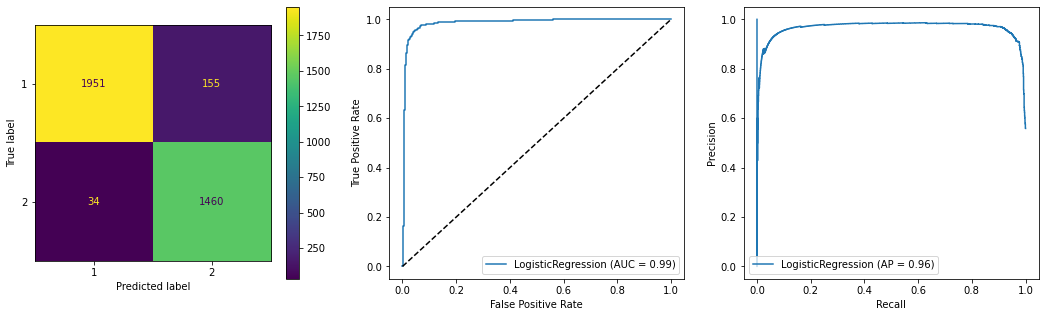

-------------------------------------------
DecisionTree Classifier

              precision    recall  f1-score   support

           1       0.95      0.98      0.96      2106
           2       0.97      0.92      0.94      1494

    accuracy                           0.95      3600
   macro avg       0.96      0.95      0.95      3600
weighted avg       0.95      0.95      0.95      3600

F1 score of minority class: 0.9437971213159699


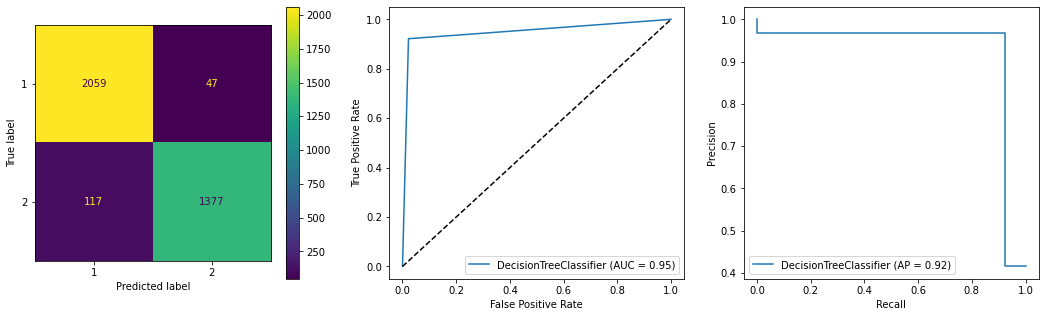

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


-------------------------------------------
Linear SVClassifier

              precision    recall  f1-score   support

           1       0.96      0.86      0.90      2106
           2       0.82      0.95      0.88      1494

    accuracy                           0.89      3600
   macro avg       0.89      0.90      0.89      3600
weighted avg       0.90      0.89      0.89      3600

F1 score of minority class: 0.8798256537982565


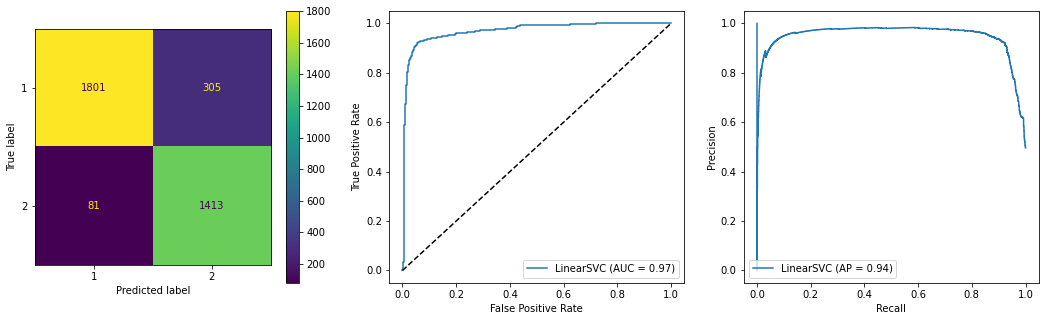

-------------------------------------------
Gaussian NaiveBayes Classifier

              precision    recall  f1-score   support

           1       0.96      0.95      0.96      2106
           2       0.93      0.95      0.94      1494

    accuracy                           0.95      3600
   macro avg       0.95      0.95      0.95      3600
weighted avg       0.95      0.95      0.95      3600

F1 score of minority class: 0.9397670549084859


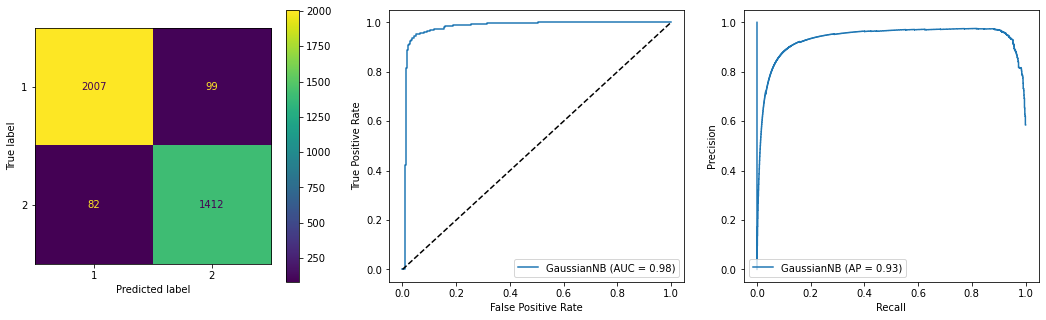

-------------------------------------------
k-Nearest Neighbour Classifier

              precision    recall  f1-score   support

           1       0.97      0.98      0.97      2106
           2       0.97      0.96      0.96      1494

    accuracy                           0.97      3600
   macro avg       0.97      0.97      0.97      3600
weighted avg       0.97      0.97      0.97      3600



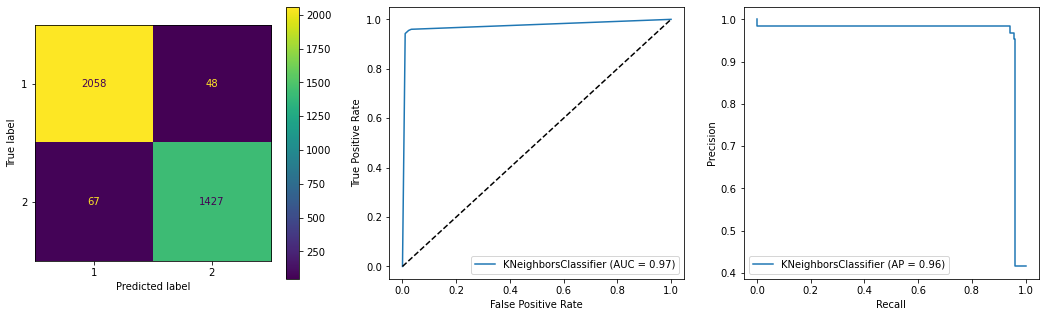

F1 score of minority class: 0.9612664196699224
-------------------------------------------
Random Forest Classifier

              precision    recall  f1-score   support

           1       0.97      0.99      0.98      2106
           2       0.99      0.95      0.97      1494

    accuracy                           0.97      3600
   macro avg       0.98      0.97      0.97      3600
weighted avg       0.97      0.97      0.97      3600



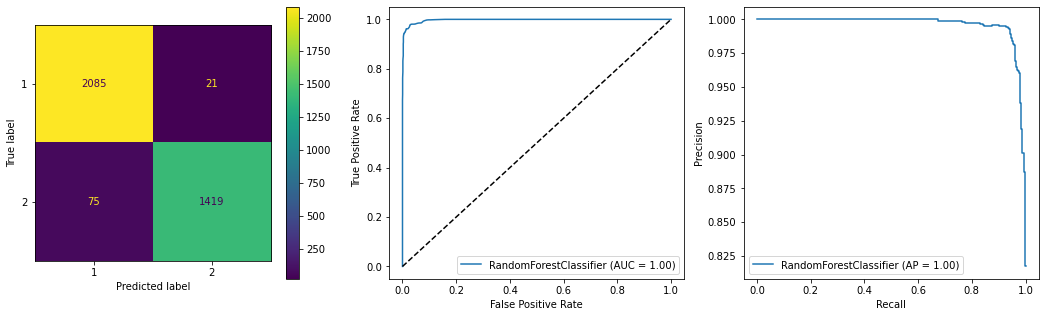

F1 score of minority class: 0.967280163599182


[0.9392087487938245,
 0.9437971213159699,
 0.8798256537982565,
 0.9397670549084859,
 0.9612664196699224,
 0.967280163599182]

In [26]:
f1_pca =  []
f1_pca.append(logistic(train_X,train_y,test_X,test_y))
f1_pca.append(decisionTree(train_X,train_y,test_X,test_y))
f1_pca.append(linearSVC(train_X,train_y,test_X,test_y))
f1_pca.append(naiveBayes(train_X,train_y,test_X,test_y))
f1_pca.append(knn(train_X,train_y,test_X,test_y))
f1_pca.append(randomForest(train_X,train_y,test_X,test_y))
f1_pca

Even with PCA, the models gave good result.

<AxesSubplot:>

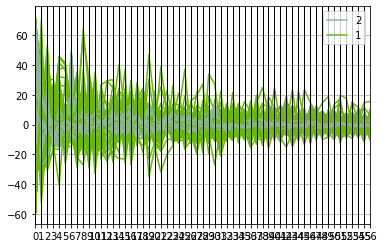

In [77]:
pca_test_X = pd.DataFrame(pca_test_X)
pca_test_X['label'] = test_y
pd.plotting.parallel_coordinates(pca_test_X, 'label')

# k Means Clustering

Lets try to correlate our classification problem with clusteing. Here we are giving input as 2 clusters and see whether those 2 clusters resembles our class labels.

In [87]:
train_X,train_y,test_X,test_y = reset(train,test)

train_X,test_X = fourier(train_X,test_X)
train_X,test_X = savgol(train_X,test_X)
train_X,test_X = norm(train_X,test_X)
train_X,test_X = robust(train_X,test_X)

In [76]:
pca = PCA(n_components=3)
pca.fit(test_X)
print(pca.explained_variance_ratio_)
pca_test_X = pca.transform(test_X)

[0.45808207 0.11457986 0.03286526]


In [88]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(test_X)

In [89]:
print(y_predicted[:40])
print(test_y[:40])

[1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1
 1 0 1]
[2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


In [90]:
y_predicted
y_predicted = np.where(y_predicted == 1, 2, y_predicted)
y_predicted = np.where(y_predicted == 0, 1, y_predicted)
#y_predicted = np.where(y_predicted == 3, 1, y_predicted)

In [91]:
print(classification_report(test_y,y_predicted))
print(confusion_matrix(test_y,y_predicted))

              precision    recall  f1-score   support

           1       1.00      0.47      0.64       565
           2       0.02      1.00      0.03         5

    accuracy                           0.47       570
   macro avg       0.51      0.73      0.33       570
weighted avg       0.99      0.47      0.63       570

[[264 301]
 [  0   5]]


In [81]:
pca_test_X = pd.DataFrame(pca_test_X)
a = pd.Series(test_y)
b = pd.Series(y_predicted)
pca_test_X = pd.concat([pca_test_X,a.rename('original'),b.rename('cluster')], axis=1)

In [83]:
pca_test_X.tail()

,0,1,2,original,cluster
565,29.442757,12.578741,16.849354,1,2
566,-4.573047,10.250404,-6.328111,1,1
567,-6.163943,-1.083529,-0.105639,1,1
568,11.583210,-17.092913,15.488171,1,2
569,-0.799989,-20.092022,15.529447,1,2


In [96]:
x2 = pca_test_X[pca_test_X["original"]==2]
x1 = pca_test_X[pca_test_X["original"]==1]
y2 = pca_test_X[pca_test_X["cluster"]==2]
y1 = pca_test_X[pca_test_X["cluster"]==1]

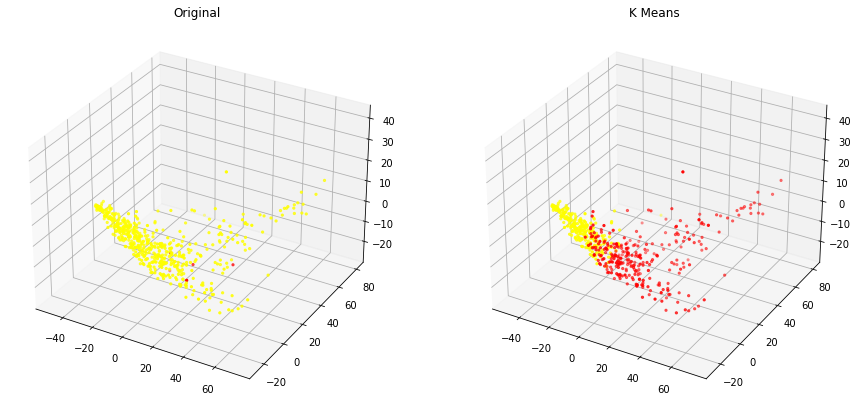

In [103]:
fig = plt.figure(figsize=(15,7))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.set_title('Original')
ax.scatter(x1.iloc[:,0],x1.iloc[:,1],x1.iloc[:,2],c='yellow',s=5)
ax.scatter(x2.iloc[:,0],x2.iloc[:,1],x2.iloc[:,2],c='red',s=5)
ax = fig.add_subplot(1,2,2, projection='3d')
ax.set_title('K Means')
ax.scatter(y1.iloc[:,0],y1.iloc[:,1],y1.iloc[:,2],c='yellow',s=5)
ax.scatter(y2.iloc[:,0],y2.iloc[:,1],y2.iloc[:,2],c='red',s=5)

From the above figure we can observe that both the clusters are different although all of our stars with exoplanets are in one cluster (Right side figure - red cluster).

# Conclusion

- Without feature engineering and with original testing dataset, all the models gave low scores.
- Hyperparameter tuning on original data gave unsatisfactory results.
- With feature engineering and Original dataset, the models have improved their scores considerably.
- With SMOTE, we got a perfect classification scores for almost all scores.
- PCA with 5 columns also gave a good result.The score for Gaussian NB and kNN also improved with PCA.

Below table shows F1 scores of testing data with different combinations of scalers and normalizations

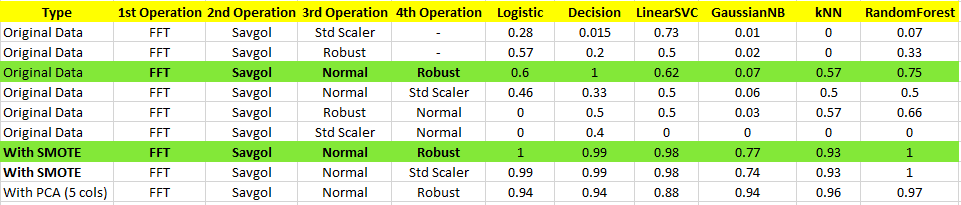

From this we can conclude that the feature engineering with Fast Fourier Transform, Savitzky-Golay filter, Normalization and then Robust Scaler yields best results. **Decision Tree** gave best result for the original testing data.

# Comparison of Machine Learning Models

In [27]:
cols = ['Logistic','DecisionTree','LinearSVC','NaiveBayes','kNN','RandomForest']
import pandas as pd
df = pd.DataFrame(list(zip(f1_original,f1_processed,f1_smote,f1_pca)),columns = 
                  ['Original Data','Processed','Processed with SMOTE','Processed-SMOTE and PCA'],index=cols) 
df

,Original Data,Processed,Processed with SMOTE,Processed-SMOTE and PCA
Logistic,0.037736,0.600000,0.996815,0.939209
DecisionTree,0.153846,1.000000,0.990488,0.943797
LinearSVC,0.027907,0.666667,0.965276,0.879826
NaiveBayes,0.017668,0.070423,0.756835,0.939767
kNN,0.000000,0.571429,0.930799,0.961266
RandomForest,0.000000,0.571429,0.998724,0.967280


<AxesSubplot:>

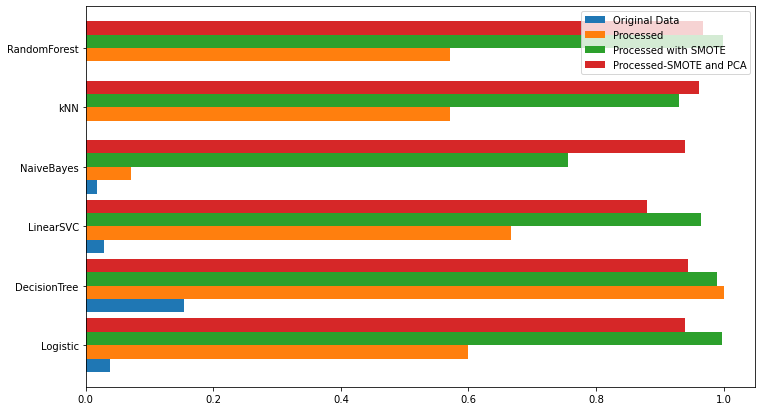

In [71]:
f,ax = plt.subplots(figsize=(12,7))
df.plot.barh(ax=ax,width=0.9,linewidth=1)

# From the above results, we can conclude that Logistic Regression and Random Forest with SMOTE gave the best F1-score and overall scores.

### Reference:
- Signal Processing: [Kaggle/muonneutrino](https://www.kaggle.com/muonneutrino/exoplanet-data-visualization-and-exploration)
- [Pandas](https://pandas.pydata.org/docs/)